Importing required files


In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

Reading data

In [3]:
df = pd.read_csv("http://bit.ly/w-data")
X = df["Hours"].values                  # Converting dataframe column to an array. This will serve as the independent variable
X=X.reshape((-1, 1))                    # Reshaping for 
y = df["Scores"].values                 # Converting dataframe column to an array. This will serve as the dependent variable          

[[1.         0.97619066]
 [0.97619066 1.        ]]


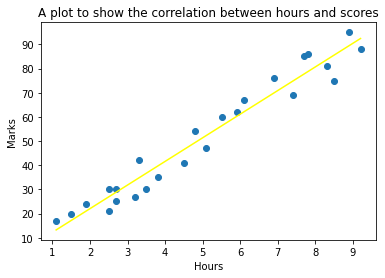

In [4]:

x = df["Hours"]
y = df["Scores"]

print(np.corrcoef(x, y))

plt.scatter(x, y) 
plt.title('A plot to show the correlation between hours and scores')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='yellow')
plt.show()

From the graph and pearson correlation we can clearly deduce that there is a positive corelation between marks and time

Now we can build a modal. We start by splitting data into two parts. One for training and the other for testing

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

Fitting in a simple linear regression model we get

In [6]:
modelLR = LinearRegression()

modelLR.fit(X_train, y_train) 

LinearRegression()

In [7]:
y_pred = modelLR.predict(X_test) # Predicting the scores
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
s1=metrics.mean_absolute_error(y_test, y_pred)

Mean Absolute Error: 4.183859899002975


Next we build a Ridge regression model. It simply adds a penalty so that we donot overfit our model. The value of alpha must be determined for best results

In [8]:
x=1.0               #Starting value
Ralpha={}


while True:
    modelR = Ridge(alpha=x)
    modelR.fit(X_train, y_train) 
    
    y_pred = modelR.predict(X_test) # Predicting the scores
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
    m=metrics.mean_absolute_error(y_test, y_pred)
    print('Mean Absolute Error:', m)
    y=x-1
    if x==1:
        Ralpha[x]=m
        
    elif m<Ralpha[y]:
        Ralpha[x]=m
    else:
        break                     # If the model isn't improving anymore the loop breaks
    x=x+1
f = min(Ralpha.values())
for k, v in Ralpha.items():
    if v==f:
        alpha=k


Mean Absolute Error: 4.0893423672211195
Mean Absolute Error: 3.99633027522936
Mean Absolute Error: 3.9047879400796432
Mean Absolute Error: 3.8146807976922106
Mean Absolute Error: 3.725975359342921
Mean Absolute Error: 3.6386391701654746
Mean Absolute Error: 3.5526407695606936
Mean Absolute Error: 3.4679496534111665
Mean Absolute Error: 3.3845362380061603
Mean Absolute Error: 3.3023718255869667
Mean Absolute Error: 3.221428571428575
Mean Absolute Error: 3.2077127345686294
Mean Absolute Error: 3.2280856423173816


checking if the model can be improved further

In [10]:
f = min(Ralpha.values())
for k, v in Ralpha.items():
    if v==f:
        alpha=k

modelL= Ridge(alpha=alpha+0.01)       
modelL.fit(X_train, y_train) 
y_pred = modelL.predict(X_test) # Predicting the scores
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  

if f>metrics.mean_absolute_error(y_test, y_pred):
    alpha=alpha+0.01

Training complete.


In [11]:
print(alpha)

12.0


In [12]:
x=1.0
Lalpha={}

while True:
    modelR = Lasso(alpha=x)
    modelR.fit(X_train, y_train) 
    print("Training complete.")
    y_pred = modelR.predict(X_test) # Predicting the scores
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
    m=metrics.mean_absolute_error(y_test, y_pred)
    print('Mean Absolute Error:', m) 
    y=x-1
    if x==1:
        Lalpha[x]=m
        
    elif m<Lalpha[y]:
        Lalpha[x]=m
    else:
        break
    x=x+1
e = min(Lalpha.values())
for k, v in Lalpha.items():
    if v==e:
        alpha2=k

Training complete.
Mean Absolute Error: 3.9915771073417106
Training complete.
Mean Absolute Error: 3.799294315680439
Training complete.
Mean Absolute Error: 3.6070115240191654
Training complete.
Mean Absolute Error: 3.4147287323578936
Training complete.
Mean Absolute Error: 3.2224459406966233
Training complete.
Mean Absolute Error: 3.236624368768614


In [14]:
for k, v in Lalpha.items():
    if v==e:
        alpha2=k

modelL= Lasso(alpha=alpha2+0.01)       
modelL.fit(X_train, y_train) 
y_pred = modelL.predict(X_test) # Predicting the scores
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  

if f>metrics.mean_absolute_error(y_test, y_pred):
    alpha2=alpha2+0.01
print(alpha2)

5.0


Checking which model is best

In [16]:
if f>e:
    print("Lasso")
else:
    print("Ridge")

Ridge


Hence ridge regression is the best possible model

In [17]:
t = [6.125]
answer = modelR.predict([t])
print("If the student studies for 6.125 hours, he is expected to score {}".format(round(answer[0],3)))

If the student studies for 6.125 hours, he is expected to score 61.861
